In [1]:
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
import numpy as np
import pandas as pd
import re
from datetime import datetime
import time
from selenium import webdriver
import math
import matplotlib.pyplot as plt
from unidecode import unidecode
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

## Loading data

In [2]:
data = pd.read_csv('devices.csv')

## PCA

**dropping NaNs for quick PCA**

Now, the column with most missings has 6% of missing values, so it might be ok do drop those...

In [3]:
print('numero de aparelhos antes do drop: ', data.shape[0])
data = data.dropna()
print('numero de aparelhos depois do drop: ', data.shape[0])

numero de aparelhos antes do drop:  1201
numero de aparelhos depois do drop:  1096


In [4]:
X = data.drop(columns=['modelo_celular'])
X = pd.get_dummies(X, prefix='prop_')

Now, we can apply PCA tecnique to help us see all columns as two variables. This will improve analysis and see how people are distanced...

In [5]:
# def pca_fit():
X = X
n_components = 2
# instantiate and fit the pca object
X_std = StandardScaler().fit_transform(X)
# X_std = X

pca = PCA(n_components)
pca.fit(X_std)

print(f'each pca explains: {pca.explained_variance_ratio_}')
explains = pca.explained_variance_ratio_.sum()
print(f'Both components explain together {round(explains*100,2)}% of the data')

#now transform!
X_pca = pca.transform(X_std)

#check results
print("\noriginal shape:   ", X.shape)
print("\ntransformed shape:", X_pca.shape)
pc1 = X_pca[:,0]
pc2 = X_pca[:,1]

each pca explains: [0.15074411 0.0995777 ]
Both components explain together 25.03% of the data

original shape:    (1096, 54)

transformed shape: (1096, 2)


In [6]:
c = data.modelo_celular.apply(lambda x: 'blue' if 'iphone' in x \
                                          else ('red' if 'samsung' in x \
                                                else ('green' if 'huawei' in x \
                                                      else ('black' if 'motorola' in x else 'yellow'))))

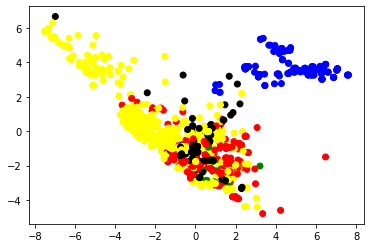

In [7]:
# c = np.array(data.ios.apply(lambda x: 'blue' if x != 0 else 'red'))
# c = data.modelo_celular.apply(lambda x: 'blue' if 'iphone' in x else ('red' if 'samsung' in x else 'yellow'))
plt.scatter(x=pc1, y=pc2, c=c)

- We will also create a function for ploting Kmeans using different number of clusters

## KMeas: dividing all smartphones in groups of 4-5

In [8]:
#making clusters of somewhat 5 smartphones
n_clusters = round(X.shape[0]/5)

kmeans = KMeans(n_clusters)

kmeans.fit(X_std)

labels = kmeans.labels_

#add to the dataframe as groups
data['cluster'] = labels + 1

#generate data for plot
pc1 = X_pca[:,0]
pc2 = X_pca[:,1]

c_labels = kmeans.labels_

- Now let us see the results

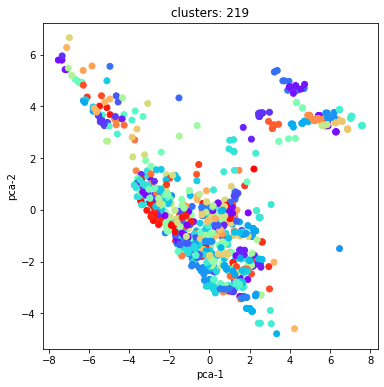

In [9]:
fig, axis = plt.subplots(nrows=1,ncols=1,figsize=(6,6))

axis.scatter(x=pc1, y=pc2, c=c_labels, cmap='rainbow')
axis.set_title(f'clusters: {n_clusters}')
axis.set_xlabel('pca-1')
axis.set_ylabel('pca-2')
plt.show()

In [10]:
data

,Unnamed: 0,modelo_celular,menor_preco,data_anuncio,tela,touchscreen,4g,3g,camera traseira,camera selfie,...,auto rotacao,multitouch,resistente a respingos d'agua,force touch,curva,full hd,resistente a arranhoes,resistente a queda,3d,cluster
0,0,smartphone samsung galaxy s10 sm-g973f desbloq...,40999,2020,6.10,1,1,1,16.0,10.0,...,0,0,0,0,0,0,0,0,0,46
1,1,smartphone huawei p20 pro desbloqueado 128gb a...,16935,2018,6.10,1,1,1,40.0,24.0,...,0,0,0,0,0,0,0,0,0,166
2,15,"iphone 11 pro max apple 512gb 6.5"" desbloquead...",8499,2019,6.50,1,1,1,12.0,12.0,...,0,0,0,0,0,1,0,0,0,86
3,16,"iphone 11 pro max apple 512gb 6.5"" desbloquead...",8499,2019,6.50,1,1,1,12.0,12.0,...,0,0,0,0,0,1,0,0,0,86
4,17,smartphone samsung galaxy z flip sm-f700f desb...,8369,2020,6.70,1,1,1,12.0,10.0,...,0,0,0,0,0,0,0,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,2601,celular bright 0498 desbloqueado dual chip bra...,89,2018,1.80,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,164
1189,2602,celular multilaser up play p9076 desbloqueado ...,89,2019,1.80,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,18
1191,2605,celular multilaser up play p9077 desbloqueado ...,85,2018,1.77,0,0,0,0.3,0.0,...,0,0,0,0,0,0,0,0,0,18
1192,2606,celular multilaser new up desbloqueado p9032 d...,85,2017,1.80,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,164
